## Natural Language Processing (NLP) using NLTK (Natural Language Toolkit)

In this notebook, we will explore the NLP, which focuses on the interaction between computers and human language. NLP allows computers to understand, interpret, and generate human language in a meaningful way, opening up a wide range of possibilities for language-based applications.

NLTK is a powerful Python library for working with human language data. It provides a suite of tools and methods for various NLP tasks, such as tokenization, part-of-speech tagging, syntactic analysis and more.

Throughout this notebook, we will delve into different aspects of NLP using NLTK, learning how to preprocess text data, analyze linguistic patterns, and extract meaningful insights from text.

## Table of content

### [1. Import libraries](#1-import-libraries)
### [2. Word cloud](#2-word-cloud)

## 1. Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from PIL import Image

## 2. Word cloud

*Reference: https://github.com/lkuffo/data-viz/blob/main/NIVEL6/1_wordcloud.ipynb*

In [2]:
# df containing the reviews of each listing.
rev = pd.read_csv('https://data.insideairbnb.com/italy/lazio/rome/2023-12-15/data/reviews.csv.gz')

In [3]:
df3 = rev.copy()

In [4]:
df3.shape

(1621362, 6)

In [5]:
# drop nan values
df3 = df3.dropna()
df3.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

In [6]:
df3 = df3.head(10000) #I can't get the cloud to load with the full dataset, so I'm going to select the first 10000 rows.

In [7]:
df3.shape

(10000, 6)

In [8]:
text = []
for comment in df3['comments']:
    text.append(comment) # save all comments in a list str

In [9]:
def split_palabra(texto): 
    """
    Function that separates each word using space delimiter
    """
    palabra=str(texto).split() 
    return palabra
palabras = split_palabra(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kina5\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


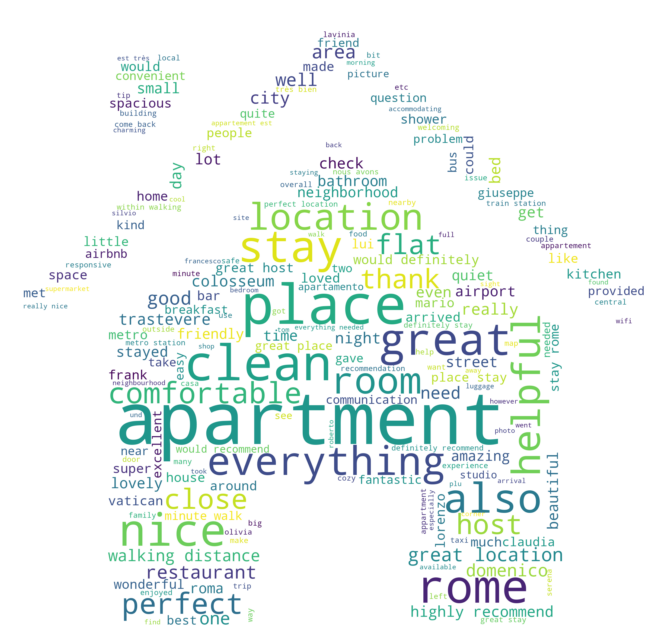

In [21]:
# create the mask to make the word cloud into an image.
mask = np.array(Image.open("home.jpg")) #create the mask from the image of a house
mask[mask == 1] = 255 # white pixels (with a value of 255) could define the areas where words will be displayed, while black pixels (with a value of 0) could define the areas where no words will be displayed.

# Download stopwords: To filter out irrelevant words (articles, prepositions).
nltk.download('stopwords')

# Get stopwords in English and Spanish
stop_words_es = set(stopwords.words("spanish"))
stop_words_en = set(stopwords.words("english"))

#Join stopwords from both languages
stop_words = stop_words_es.union(stop_words_en)

# Create word cloud
palabras_final = ' '.join(palabras).lower().replace(',',' ').replace(':','')
palabras_final = re.sub(r'\b\w{1,2}\b', '', palabras_final)  # Remove 1 or 2 character words, because I was getting some single r's and b's.
nube = WordCloud(width=800, height=400, background_color='white',stopwords=stop_words,mask=mask).generate(palabras_final)

# show word cloud
plt.figure(figsize=(10, 8))
plt.imshow(nube, interpolation='bilinear') # interpolates the pixel values in the image to create a smoother, more continuous appearance.
plt.axis('off')
plt.show()
nube.to_file("./nube_airbnb.png")